# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Ulfa Stevi Juliana
- **Email:** steviulpa@gmail.com
- **ID Dicoding:** ulfasj

## Menentukan Pertanyaan Bisnis

- Bagaimana cuaca memengaruhi penyewaan sepeda?
- Bagaimana perbedaan penyewaan sepeda di setiap musim?
- Bagaimana Pengaruh Hari Libur terhadap Jumlah Penyewaan Sepeda?
- Seberapa stabil permintaan penyewaan sepeda setiap hari, dan apakah diperlukan strategi ekspansi atau peningkatan pemasaran? (dijawab di analysis lanjutan)

## Import Semua Packages/Library yang Digunakan

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

Di sini, saya menggunakan dataset penyewaan sepeda per jam (hour.csv). Alasan saya tidak menggunakan dataset penyewaan sepeda per hari (day.csv) adalah karena saya ingin menganalisis pola penyewaan dengan tingkat detail yang lebih tinggi.

### Gathering Data

Di sini, saya menyimpan dataset ke dalam sebuah tabel (DataFrame) dengan nama df. Dan saya juga menampilkan lima baris teratas (indeks 0 hingga 4) dari tabel tersebut.

In [19]:
df = pd.read_csv("hour.csv")
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:** Dapat dilihat dari output, bahwa di dalam tabel df terdapat kolom-kolom seperti :
- instant: Nomor indeks record.
- dteday: Tanggal data diambil.
- season: Musim dalam bentuk angka dengan ketentuan berikut : <br>
1: musim semi<br>
2: musim panas<br>
3: musim gugur<br>
4: musim dingin
- yr: Tahun, dengan ketentuan berikut :<br>
0 = 2011 <br>
1 = 2012
- mnth: Bulan dari 1 hingga 12.
- hr: Jam dalam format 24 jam.
- holiday: dengan ketentuan :<br>
1 = hari tersebut libur<br>
0 = bukan libur.
- weekday: Hari dalam minggu dengan ketentuan berikut :<br>
0 = Minggu<br>
1 = Senin, dan seterusnya.
- workingday: dengan ketentuan berikut :<br>
1 jika hari kerja (bukan libur)<br>
0 jika tidak.
- weathersit: Kondisi cuaca dalam kode numerik dengan ketentuan berikut :<br>
1 = cerah/sedikit berawan<br>
2 = mendung<br>
3 = hujan ringan/salju<br>
4 = cuaca ekstrem
- temp: Suhu yang telah di normalisasi menggunakan rumus sehingga hasilnya berada dalam skala 0 hingga 1.
- atemp: suhu yang benar-benar dirasakan oleh manusia, bukan hanya suhu udara yang diukur secara objektif.
- hum: Kelembapan yang telah di normalisasi menggunakan rumus sehingga hasilnya berada dalam dalam skala 0 hingga 1.
- windspeed: Kecepatan angin yang telah di normalisasi menggunakan rumus sehingga hasilnya berada dalam dalam skala 0 hingga 1.
- casual: Jumlah belum terdaftar.
- registered: Jumlah pengguna terdaftar.
- cnt: Jumlah total penyewaan sepeda.

### Assessing Data

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Tidak ada data yang hilang (*null*), karena jumlah entri di setiap kolom sesuai dengan total baris dataset (Dataset terdiri dari **17.379 baris** dan **17 kolom**).  
- Jenis data yang terdapat dalam dataset meliputi:  
  - **Tipe teks (object):** Kolom `dteday` bertipe *object* (string), _ini harus ditangani di tahap pembersihan data_.  
  - **Tipe desimal (float):** Kolom `temp`, `atemp`, `hum`, dan `windspeed` menggunakan tipe float64.  
  - **Tipe numerik (integer):** Kolom seperti `season`, `yr`, `mnth`, `hr`, dan lainnya bertipe integer.  


In [21]:
print("Jumlah duplikasi: ", df.duplicated().sum())
df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- tidak ada duplikasi pada dataset
- tidak terdapat keanehan dalam ringkasan parameter statistik dari tabel df

### Cleaning Data

In [22]:
df['dteday'] = pd.to_datetime(df['dteday'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Mengubah tipe data pada kolom dteday dari yang sebelumnya bertipe data object menjadi datetime.
- dapat dilihat pada output, tipe datanya berhasil diubah


## Exploratory Data Analysis (EDA)

### Explore: Statistik Deskriptif Data Penyewaan Sepeda

In [23]:
df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**

- Mayoritas hari memiliki cuaca cerah (**weathersit** rata-rata **1.43**), sedangkan cuaca ekstrem jarang terjadi.  
- Penyewaan cenderung lebih tinggi di musim panas (**season = 2**) dibanding musim dingin (**season = 4**).
- Hari libur hanya **2.8%** dari total data (**holiday** rata-rata **0.028**), sedangkan mayoritas data berasal dari hari kerja (**workingday** rata-rata **0.68**).  









### Explore: Pengaruh Cuaca terhadap Penyewaan Sepeda

In [24]:
df.groupby("weathersit").agg(
    cnt_max=("cnt", "max"),
    cnt_min=("cnt", "min"),
    cnt_mean=("cnt", "mean"),
    cnt_std=("cnt", "std")
)

,cnt_max,cnt_min,cnt_mean,cnt_std
weathersit,,,,
1,977,1,204.869272,189.487773
2,957,1,175.165493,165.431589
3,891,1,111.579281,133.781045
4,164,23,74.333333,77.925178


- Penyewaan tertinggi saat cuaca cerah (**204.87** rata-rata, maks **977**).  
- Variasi tinggi (**std 189.49**) menunjukkan fluktuasi penyewaan.  
- Penyewaan turun drastis saat cuaca buruk (**weathersit = 3 atau 4**).  
- Cuaca ekstrem (**weathersit = 4**) hanya **74.33** rata-rata, maks **164**.  

**Kode Cuaca:**  
- **1** = Cerah  
- **2** = Berkabut  
- **3** = Hujan ringan  
- **4** = Hujan lebat  

### Explore: Pengaruh Musim terhadap Penyewaan Sepeda

In [25]:
df.groupby("season").agg(
    cnt_max=("cnt", "max"),
    cnt_min=("cnt", "min"),
    cnt_mean=("cnt", "mean"),
    cnt_std=("cnt", "std")
)

,cnt_max,cnt_min,cnt_mean,cnt_std
season,,,,
1,801,1,111.114569,119.224010
2,957,1,208.344069,188.362473
3,977,1,236.016237,197.711630
4,967,1,198.868856,182.967972


**Insight:**
- Rata-rata penyewaan tertinggi terjadi di **musim gugur (season = 3)** dengan **236 sepeda**, dan penyewaan maksimal mencapai **977**.  
- **Musim semi (season = 1)** memiliki rata-rata penyewaan terendah (**111 sepeda**) dengan penyewaan maksimal hanya **801**.  
- Ini menunjukkan bahwa kondisi di musim semi mungkin kurang mendukung aktivitas bersepeda dibandingkan musim lainnya.  
- **Musim panas (season = 2)** memiliki rata-rata penyewaan **208 sepeda**, sedangkan **musim dingin (season = 4)** mencapai **198 sepeda**.  
- Meskipun musim dingin cenderung kurang nyaman untuk bersepeda, jumlah penyewaannya tetap tinggi, kemungkinan karena faktor lain seperti kebutuhan transportasi.  








In [26]:
### Explore: Pengaruh Hari Libur terhadap Penyewaan Sepeda

In [27]:
df["holiday"].value_counts()

,count
holiday,
0,16879
1,500


**Insight:**
- Mayoritas data berasal dari hari kerja, yaitu 16.879 data (97.1%), sedangkan hanya 500 data (2.9%) yang merupakan hari libur.
-Jika terdapat perbedaan signifikan dalam jumlah penyewaan, faktor-faktor seperti cuaca, musim, atau preferensi pengguna bisa menjadi pertimbangan untuk mengoptimalkan layanan, seperti menambah armada pada hari tertentu atau menawarkan promo khusus di hari libur.

**Note:**1 = hari tersebut libur
0 = bukan libur.

In [28]:
df.groupby("holiday")["cnt"].agg(["mean", "std", "max", "min"])

,mean,std,max,min
holiday,,,,
0,190.42858,181.981435,977,1
1,156.87000,156.757478,712,1


**Insight:**
- Penyewaan lebih tinggi pada hari kerja: Rata-rata **190.43**, lebih tinggi dari hari libur **156.87**.  
- Variabilitas lebih besar: Standar deviasi hari kerja **181.98**, lebih tinggi dari hari libur **156.76**.  
- Penyewaan maksimal lebih tinggi: Hari kerja **977**, hari libur **712**.  



## Visualization & Explanatory Analysis

### Pertanyaan 1:

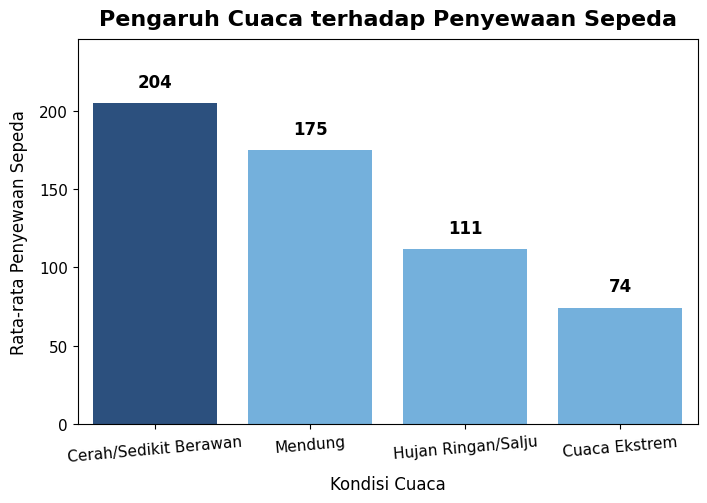

In [29]:
weather_labels = {
    1: "Cerah/Sedikit Berawan",
    2: "Mendung",
    3: "Hujan Ringan/Salju",
    4: "Cuaca Ekstrem"
}

df["weathersit"] = df["weathersit"].replace(weather_labels)

weather_avg_rentals = df.groupby("weathersit")["cnt"].mean().reset_index()

weather_avg_rentals = weather_avg_rentals.sort_values(by="cnt", ascending=False)

base_color = "#63b3ed"
highlight_color = "#1e4e8c"
colors = [highlight_color if i == 0 else base_color for i in range(len(weather_avg_rentals))]

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=weather_avg_rentals,
    x="weathersit",
    y="cnt",
    hue="weathersit",
    palette=colors,
    legend=False
)

max_height = weather_avg_rentals["cnt"].max()
plt.ylim(0, max_height * 1.2)

for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2, p.get_height() + max_height * 0.05),
        ha="center",
        fontsize=12,
        fontweight="bold"
    )

plt.title("Pengaruh Cuaca terhadap Penyewaan Sepeda", fontsize=16, fontweight="bold", pad=10)
plt.xlabel("Kondisi Cuaca", fontsize=12, labelpad=8)
plt.ylabel("Rata-rata Penyewaan Sepeda", fontsize=12, labelpad=8)
plt.xticks(rotation=5, fontsize=11)
plt.yticks(fontsize=11)

plt.show()


**Insight:**
Penyewaan tertinggi saat **cuaca cerah (204)**, menurun saat **mendung (175)**, **hujan ringan (111)**, dan terendah saat **cuaca ekstrem (74)**.  

Faktor yang Mempengaruhi:
- **Cuaca cerah** membuat jalan lebih aman dan nyaman.  
- **Suhu bersahabat** mendorong lebih banyak orang bersepeda.  
- **Hujan/cuaca ekstrem** membuat jalan licin, mengurangi minat bersepeda.  

### Pertanyaan 2:

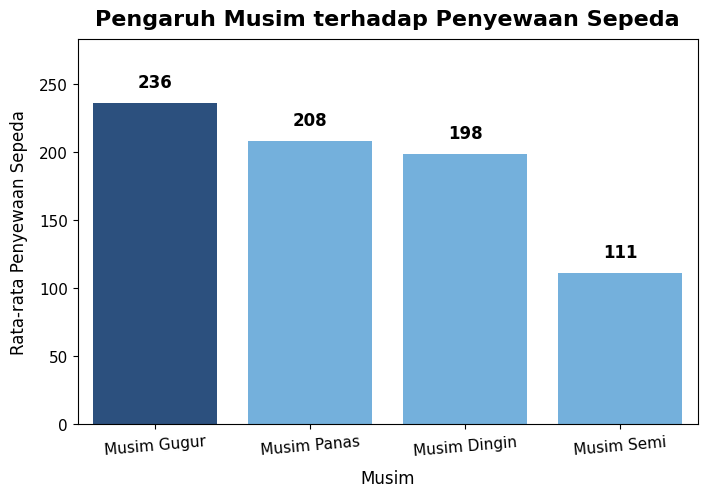

In [30]:
season_labels = {
    1: "Musim Semi",
    2: "Musim Panas",
    3: "Musim Gugur",
    4: "Musim Dingin"
}

df["season"] = df["season"].replace(season_labels)

df_season = df.groupby("season")["cnt"].mean().reset_index()

df_season = df_season.sort_values(by="cnt", ascending=False)

base_color = "#63b3ed"
highlight_color = "#1e4e8c"
colors = [highlight_color if i == 0 else base_color for i in range(len(df_season))]

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=df_season,
    x="season",
    y="cnt",
    hue="season",
    palette=colors,
    legend=False
)

max_height = df_season["cnt"].max()
plt.ylim(0, max_height * 1.2)

for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2, p.get_height() + max_height * 0.05),
        ha="center",
        fontsize=12,
        fontweight="bold"
    )

plt.title("Pengaruh Musim terhadap Penyewaan Sepeda", fontsize=16, fontweight="bold", pad=10)
plt.xlabel("Musim", fontsize=12, labelpad=8)
plt.ylabel("Rata-rata Penyewaan Sepeda", fontsize=12, labelpad=8)
plt.xticks(rotation=5, fontsize=11)
plt.yticks(fontsize=11)

plt.show()

Penyewaan tertinggi di **musim panas (5644)**, menurun di **musim semi (4992)** dan **musim gugur (4728)**, lalu anjlok di **musim dingin (2604)**.  

Faktor yang Mempengaruhi:
- **Musim panas**: Cuaca ideal, suhu hangat, siang lebih lama.  
- **Musim semi & gugur**: Masih nyaman meski lebih dingin.  
- **Musim dingin**: Suhu dingin, jalan licin, bersepeda berkurang.  

### Pertanyaan 3:

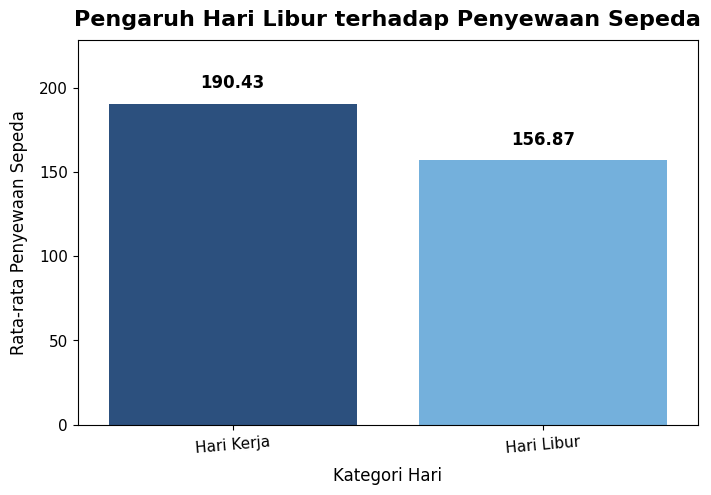

In [31]:
holiday_labels = {
    0: "Hari Kerja",
    1: "Hari Libur"
}

df_holiday = df.groupby("holiday")["cnt"].mean().reset_index()

df_holiday["holiday"] = df_holiday["holiday"].replace(holiday_labels)

df_holiday = df_holiday.sort_values(by="cnt", ascending=False)

base_color = "#63b3ed"
highlight_color = "#1e4e8c"
colors = [highlight_color if i == 0 else base_color for i in range(len(df_holiday))]

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=df_holiday,
    x="holiday",
    y="cnt",
    hue="holiday",
    palette=colors,
    legend=False
)

max_height = df_holiday["cnt"].max()
plt.ylim(0, max_height * 1.2)

for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width() / 2, p.get_height() + max_height * 0.05),
        ha="center",
        fontsize=12,
        fontweight="bold"
    )

plt.title("Pengaruh Hari Libur terhadap Penyewaan Sepeda", fontsize=16, fontweight="bold", pad=10)
plt.xlabel("Kategori Hari", fontsize=12, labelpad=8)
plt.ylabel("Rata-rata Penyewaan Sepeda", fontsize=12, labelpad=8)
plt.xticks(rotation=5, fontsize=11)
plt.yticks(fontsize=11)

plt.show()

**Insight:**
Penyewaan lebih tinggi di **hari kerja (190,43)** dibanding **hari libur (156,87)**, turun **33,56 unit** saat libur.  

Faktor yang Mempengaruhi:
- **Hari kerja**: Lebih banyak pengguna komuter (kantor/sekolah).  
- **Hari libur**: Lebih banyak orang beristirahat atau beraktivitas lain.  
- **Pengguna kerja lebih konsisten** dibanding pengguna rekreasi.  













## Analisis Lanjutan (Opsional)

Saya memilih analisis binning untuk memahami pola penyewaan dan mendukung pengambilan keputusan:  

- Jika kategori **"Tinggi"** dominan, berarti permintaan sepeda stabil, membuka peluang ekspansi layanan.  
- Jika **"Rendah"** lebih sering muncul, strategi pemasaran perlu ditingkatkan untuk menarik lebih banyak pelanggan.  


####Binning Berdasarkan Jumlah Penyewaan
Kita akan membagi data berdasarkan jumlah penyewaan per periode tertentu (misalnya harian atau per jam) ke dalam tiga kategori:

- **0 - 100 penyewaan** → "Rendah"  
- **101 - 200 penyewaan** → "Sedang"  
- **> 200 penyewaan** → "Tinggi"  

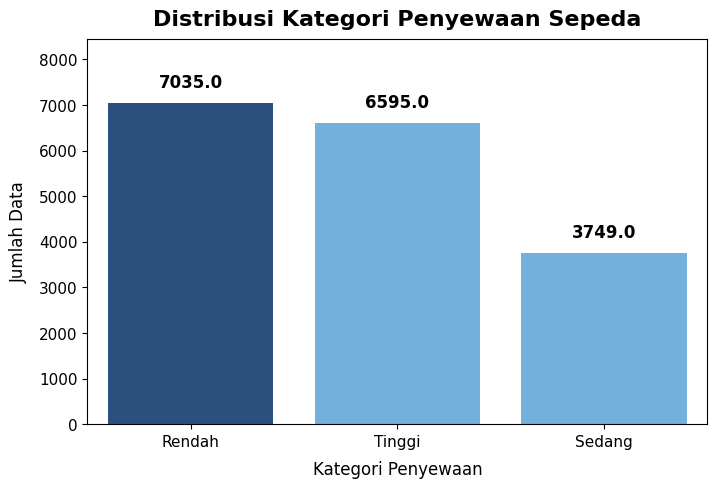

In [32]:
bins = [0, 100, 200, df["cnt"].max()]
labels = ["Rendah", "Sedang", "Tinggi"]

df["kategori_penyewaan"] = pd.cut(df["cnt"], bins=bins, labels=labels, include_lowest=True)

df_kategori = df["kategori_penyewaan"].value_counts().reset_index()
df_kategori.columns = ["Kategori", "Jumlah"]

df_kategori = df_kategori.sort_values(by="Jumlah", ascending=False)

base_color = "#63b3ed"
highlight_color = "#1e4e8c"
colors = [highlight_color if i == 0 else base_color for i in range(len(df_kategori))]

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=df_kategori,
    x="Kategori",
    y="Jumlah",
    hue="Kategori",
    palette=colors,
    legend=False,
    order=df_kategori["Kategori"]
)

max_height = df_kategori["Jumlah"].max()
plt.ylim(0, max_height * 1.2)

for p in ax.patches:
    ax.annotate(
        f"{p.get_height()}",
        (p.get_x() + p.get_width() / 2, p.get_height() + max_height * 0.05),
        ha="center",
        fontsize=12,
        fontweight="bold"
    )

plt.title("Distribusi Kategori Penyewaan Sepeda", fontsize=16, fontweight="bold", pad=10)
plt.xlabel("Kategori Penyewaan", fontsize=12, labelpad=8)
plt.ylabel("Jumlah Data", fontsize=12, labelpad=8)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.show()

**Insight:**
- **Kategori "Rendah" (0-100 penyewaan)** paling dominan (**7.035 kejadian**), menunjukkan banyak periode dengan penyewaan rendah.  
- **Kategori "Tinggi" (>200 penyewaan)** cukup sering terjadi (**6.595 kejadian**), terutama saat jam sibuk atau musim tertentu.  
- **Kategori "Sedang" (101-200 penyewaan)** paling jarang (**3.749 kejadian**), menunjukkan transisi tidak merata.  


Sebagian besar hari memiliki jumlah penyewaan dalam kategori Rendah dan Tinggi, menunjukkan pola penyewaan yang fluktuatif dan perlunya strategi untuk menstabilkan permintaan.

## Conclusion

- Conclution pertanyaan 1: Pengaruh Cuaca terhadap Penyewaan Sepeda
   - Penyewaan sepeda tertinggi terjadi saat cuaca **cerah/sedikit berawan**, diikuti oleh **mendung**.  
   - Saat **hujan ringan atau salju**, jumlah penyewaan menurun signifikan.  
   - **Cuaca ekstrem** memiliki penyewaan terendah karena kondisi jalan yang kurang aman dan kenyamanan yang berkurang.  
- Conclution pertanyaan 2 : Perbedaan Penyewaan Sepeda di Setiap Musim
   - Penyewaan sepeda **lebih tinggi di musim semi dan musim panas**, karena cuaca yang lebih hangat dan kondusif untuk bersepeda.  
   - Di **musim gugur**, penyewaan mulai menurun, seiring dengan suhu yang mulai mendingin.  
   - **Musim dingin memiliki penyewaan terendah**, kemungkinan disebabkan oleh suhu dingin, hujan salju, serta kondisi jalan yang licin.  
- Conclution pertanyaan 3 :Pengaruh Hari Libur terhadap Penyewaan Sepeda
   - Penyewaan sepeda **lebih tinggi pada hari libur** dibandingkan dengan hari kerja.  
   - Ini menunjukkan bahwa banyak orang memanfaatkan waktu luang saat hari libur untuk bersepeda, baik untuk rekreasi maupun aktivitas lainnya.  
   - Pada hari kerja, penyewaan masih cukup tinggi tetapi lebih cenderung digunakan sebagai moda transportasi untuk bekerja atau sekolah.  
- Conclution pertanyaan 4 :  Stabilitas Permintaan Penyewaan
Permintaan penyewaan **fluktuatif**, didominasi kategori **Rendah dan Tinggi**. Jika permintaan tinggi stabil, ekspansi layanan bisa dipertimbangkan. Jika sering rendah, strategi pemasaran perlu ditingkatkan untuk menarik lebih banyak pengguna. 🚲📊


In [33]:
df.to_csv("all_data.csv", index=False)